#### 1. Khái niệm quyết định câu (Decision Tree)


##### Những đặc trưng ban đầu:
1. Thời tiết
2. Độ ẩm
3. Gió


<img src="./image1.png"></img>


In [1]:
# Cây quyết định là một mô hình học máy có giám sát. 
# Cây quyết định sẽ được xây dựng từ tập dữ liệu lịch sử dựa trên những đặc trưng feature và output target . 
# Để từ đó tùy theo từng input để sử dụng cây quyết định để đưa ra kết quả . Trong cây quyết định node sẽ là cấc đặc trưng
# còn lá left sẽ các quyết định  

In [2]:
import pandas as pd
df = pd.read_excel("lophoc.xlsx")
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


#### 2. Đại lương Entropy: Giúp quyết định 
<p>  Entropy: là một đại lượng đo lường mức độ hỗn loạn của dữ liệu <br></p>
<b>1. Entropy: Càng cao </b>

-  Entropy: càng cao --> Mức độ hỗn loạn càng cao --> Trong dữ liệu chứ nhiều thông tin 

- Entropy: cao --> Thông tin bị vẩn đục, dơ 

--> Thông tin rất đa dạng 
  
<b>2. Entropy: Càng thấp </b> 
- Khó đưa quyết định khi dữ liệu có Entropy cao 
-  Thông tin chứa ít --> Chất lượng thông tin trở nên pure (tinh khiết)
-  ---> Thông tin kém đa dạng ---> Dễ đưa ra quyết định khi Entropy thấp  <br>
  

<b>3. Cách tính Entropy:  </b> 

<img src="./CachTinhENtropy.png" style="width: 50%"></img>


#### Trong phân lớp nhị phân: Entropy phân lướp là có giá trị là tin cậy 
> <i><b>Entropy=−p 
1
​
 log 
2
​
 (p 
1
​
 )−p 
2
​
 log 
2
​
 (p 
2
​
 )</b></i>

#### Entropy cap 2: 

In [3]:
import math
p1 = 4/8
p2 = 4/8
entropy = -(p1 * math.log2(p1)) - (p2 * math.log2(p2))

print("Entropy:", entropy)

Entropy: 1.0


##### Information Gain : Là hàm số dùng để thể hiện tốc độ Entropy khi thực hiện phân nhanh dữ liệu, phân chia dữ liệu
-  Công thuc: IG =  E - WE

1. Giá trị IG càng cao ---> Tốc độ giảm Entropy càng cao --> Entropy càng thấp ---> Dễ đưa ra quyết định

2. NHư vậy bản chấT GIẢI  thuật cây quyết định là tìm cách chọn lưa các đặc trưng để phân chia dữ liệu dựa vào địa lượng Information Gain
3. Nếu có nhiều cách phân chia thì ta chọn IG lớn nhất 


<img src="./a.png" style="width: 50%"></img>

##### IG lớn ---> CHọn thằng đó 

In [4]:
# Tính ENtroppy 
import math


entropyR = -0.918 * 3/7 - 1 * 2/7

print("Entropy:", entropyR)

Entropy: -0.679142857142857


<img src="./img2.png"></img>

<img src="./moHinh.png"></img>

# BAi Tap

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
df = pd.read_excel("lophoc.xlsx", sheet_name='data')
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,nghỉ
1,ốm,mưa,nghỉ
2,ốm,nắng,nghỉ
3,ốm,u ám,học
4,tốt,u ám,học
5,tốt,mưa,học
6,tốt,nắng,nghỉ


In [7]:
# Tạo dữ liệu Input (đặc trưng) và Output (Mục tiêu)
X = df.iloc[:, :-1]

y = df.iloc[:, -1]

X

,Sức khỏe,Thời tiết
0,ốm,u ám
1,ốm,mưa
2,ốm,nắng
3,ốm,u ám
4,tốt,u ám
5,tốt,mưa
6,tốt,nắng


In [8]:
from sklearn.preprocessing import LabelEncoder
enHealth = LabelEncoder()

X['Sức khỏe']= enHealth.fit_transform(X['Sức khỏe'])

enWeather = LabelEncoder()
X['Thời tiết']= enWeather.fit_transform(X['Thời tiết'])
X


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\2882001989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sức khỏe']= enHealth.fit_transform(X['Sức khỏe'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12604\2882001989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Thời tiết']= enWeather.fit_transform(X['Thời tiết'])


,Sức khỏe,Thời tiết
0,1,2
1,1,0
2,1,1
3,1,2
4,0,2
5,0,0
6,0,1


In [9]:
# Trước khi đưa vào mô hình cắt dữ liệu làm đôi
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)


In [10]:
# Nếu dùng IG phân chia nhanh thì dùng criterion="entropy"
# Mik dang dung giai thuat ID3
# max_depth=3 giới thiệu chiều cao của cây 

In [11]:
modelDT = DecisionTreeClassifier(criterion="entropy", random_state=34)
modelDT = modelDT.fit(X_train, y_train)


In [12]:
# Phân lớp: Học nghỉ
modelDT.classes_

array(['học', 'nghỉ'], dtype=object)

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_cols = X_train.columns
feature_cols


Index(['Sức khỏe', 'Thời tiết'], dtype='object')

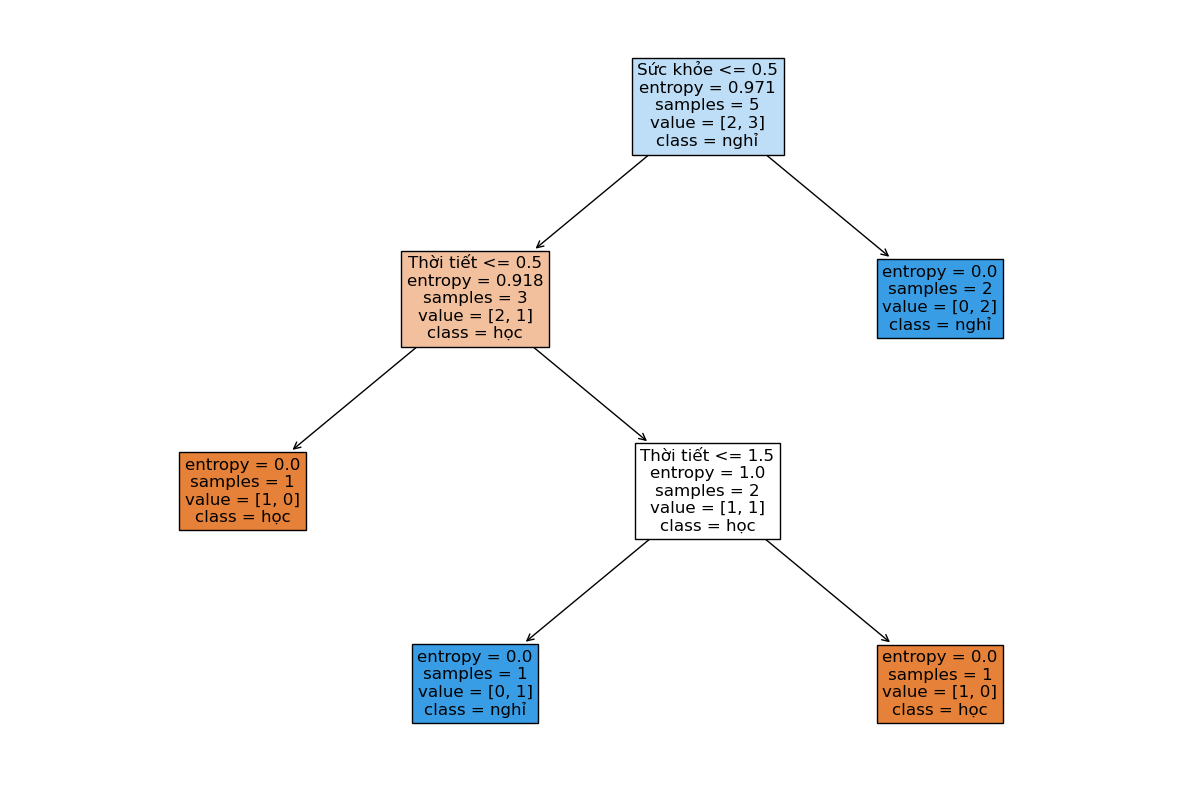

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature columns to a list of strings
feature_cols = list(X_train.columns.astype(str))

# Convert class names to a list of strings
class_names = list(modelDT.classes_.astype(str))

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(modelDT, feature_names=feature_cols, 
          class_names=class_names, fontsize=12, filled=True)

plt.show()
# Mua: 0
# Nang: 1
# U am: 2
# Chieu cao cay: 3


In [15]:
# Đánh giá mô hình
y_test_pred = modelDT.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.5


In [16]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

cf_matrix

array([[0, 1],
       [0, 1]], dtype=int64)

In [17]:
import numpy as np
healthy = 'ốm'
healthy_scaled = encHealth.transform([healthy])

weather = 'nắng'
weather_scaled = encHealth.transform([weather])

feature_sample = np.array([healthy_scaled[0], weather_scaled[0]])

y_sample_pred = modelDT.predict([feature_sample])
y_sample_pred



NameError: name 'encHealth' is not defined

Dựa trên sơ đồ Tree hãy tính IG mức độ giảm ENtropy từ thằng Gốc chia ra 2 thằng cam ,xanh